In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#File paths for CSV files
happiness_path = "Resources/world-happiness-report-2019 kaggle.csv"
pop_density_path = "Resources/world population density data 2019.csv"

#Load dataframes
happiness_df = pd.read_csv(happiness_path)
pop_density_df = pd.read_csv(pop_density_path)

In [2]:
print(happiness_df.info(), "\n")
print(pop_density_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
Country (region)           150 non-null object
Ladder                     150 non-null int64
SD of Ladder               150 non-null int64
Positive affect            149 non-null float64
Negative affect            149 non-null float64
Social support             149 non-null float64
Freedom                    149 non-null float64
Corruption                 142 non-null float64
Generosity                 149 non-null float64
Log of GDP
per capita      147 non-null float64
Healthy life
expectancy    147 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.0+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
rank         150 non-null int64
name         150 non-null object
density      150 non-null float64
densityMi    150 non-null float64
pop2019      150 non-null float64
area         150 non-null int64

In [3]:
happiness_df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
1,Albania,107,126,90.0,108.0,133.0,87.0,134.0,60.0,81.0,40.0
2,Algeria,88,56,113.0,106.0,101.0,149.0,46.0,128.0,72.0,78.0
3,Argentina,47,97,28.0,93.0,46.0,54.0,109.0,123.0,55.0,37.0
4,Armenia,116,82,126.0,145.0,117.0,123.0,93.0,129.0,91.0,64.0


In [4]:
pop_density_df.head()

,rank,name,density,densityMi,pop2019,area
0,1,Afghanistan,58.3257,151.0635,38041.754,652230
1,2,Albania,100.2128,259.5511,2880.917,28748
2,3,Algeria,18.0763,46.8176,43053.054,2381741
3,4,Argentina,16.1058,41.7141,44780.677,2780400
4,5,Armenia,99.4429,257.5572,2957.731,29743


In [5]:
#Cleaning Data
happiness_df.rename(columns={"Country (region)" : "Country"}, inplace=True)
pop_density_df.rename(columns={"name" : "Country"}, inplace=True)
#Removing countries that have incomplete data per row 
happiness_df.dropna(inplace=True,how="any")
pop_density_df.dropna(inplace=True,how="any")
#Sort by Ladder 
happiness_df=happiness_df.sort_values(by='Ladder').reset_index(drop=True)
#Merging Datasets
merged_df = pd.merge(happiness_df, pop_density_df, on="Country")
#Sort by Ladder
merged_df=merged_df.sort_values(by='Ladder').reset_index(drop=True)
merged_df.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,rank,density,densityMi,pop2019,area
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,41,16.3468,42.3383,5532.156,338424
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,34,133.9369,346.8965,5771.876,43094
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,101,16.6116,43.0239,5378.857,323802
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,55,3.2916,8.5251,339.031,103000
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,96,408.5336,1058.1020,17097.130,41850


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 16 columns):
Country                    137 non-null object
Ladder                     137 non-null int64
SD of Ladder               137 non-null int64
Positive affect            137 non-null float64
Negative affect            137 non-null float64
Social support             137 non-null float64
Freedom                    137 non-null float64
Corruption                 137 non-null float64
Generosity                 137 non-null float64
Log of GDP
per capita      137 non-null float64
Healthy life
expectancy    137 non-null float64
rank                       137 non-null int64
density                    137 non-null float64
densityMi                  137 non-null float64
pop2019                    137 non-null float64
area                       137 non-null int64
dtypes: float64(11), int64(4), object(1)
memory usage: 17.2+ KB


In [7]:
#Data frame with values we care about
density_df = pd.DataFrame(merged_df, columns = ['Country', 'Ladder', 'density', 'pop2019', 'area'])
density_df.head()

,Country,Ladder,density,pop2019,area
0,Finland,1,16.3468,5532.156,338424
1,Denmark,2,133.9369,5771.876,43094
2,Norway,3,16.6116,5378.857,323802
3,Iceland,4,3.2916,339.031,103000
4,Netherlands,5,408.5336,17097.130,41850


In [8]:
#grouping by max density
max_df = merged_df.groupby(['Country', 'pop2019'])['density'].max()
max_df.head()


Country      pop2019  
Afghanistan  38041.754     58.3257
Albania      2880.917     100.2128
Algeria      43053.054     18.0763
Argentina    44780.677     16.1058
Armenia      2957.731      99.4429
Name: density, dtype: float64

In [9]:
#grouping by max ladder
happiness_score_df = merged_df.groupby(['Country', 'density'])['Ladder'].max()
happiness_chart_df = pd.DataFrame(happiness_score_df)
happiness_chart_df.head()

,,Ladder
Country,density,
Afghanistan,58.3257,154
Albania,100.2128,107
Algeria,18.0763,88
Argentina,16.1058,47
Armenia,99.4429,116


In [10]:
#Finding the R-score for Density
xlist = merged_df['Ladder'].tolist()
ylist = merged_df['density'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(xlist, ylist)
ypred = []

for x in xlist:
    y = slope * x + intercept
    ypred.append(y)
var_list = ["Population Density"]
r_list = []
r_list.append(r2_score(ylist, ypred))


In [11]:
#initiate the linear regression 
lm=LinearRegression()
#fit on the data. It finds the line that minimizes the difference between the data points and the regression line
model_fit=lm.fit(merged_df['Ladder'].values.reshape(-1,1),merged_df['density'].values.reshape(-1,1))

f'slope: {model_fit.coef_},intercept: {model_fit.intercept_}'

'slope: [[-1.39793478]],intercept: [306.47280894]'

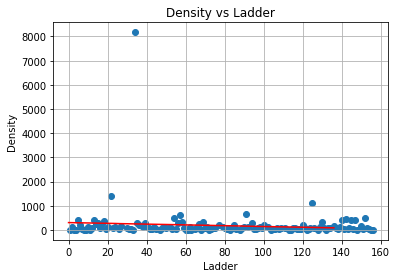

In [12]:
#Fitted line
preds=model_fit.predict(merged_df['Ladder'].values.reshape(-1,1))
#reformat to plot it
preds=[i for j in preds for i in j ]
plt.scatter(merged_df['Ladder'],merged_df['density'])
plt.grid()
plt.title("Density vs Ladder")
plt.ylabel("Density")
plt.xlabel("Ladder")
plt.plot(preds,c='r')

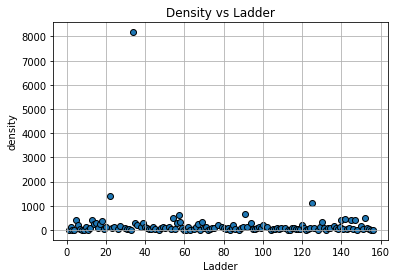

In [13]:
#scatter plot
plt.scatter(merged_df["Ladder"], merged_df["density"], edgecolors="black")
plt.grid()

plt.title("Density vs Ladder")
plt.ylabel("density")
plt.xlabel("Ladder")
plt.show()

In [14]:
#Finding the R-score for Population 2019
xlist = merged_df['Ladder'].tolist()
ylist = merged_df['pop2019'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(xlist, ylist)
ypred = []

for x in xlist:
    y = slope * x + intercept
    ypred.append(y)


r2_score(ylist, ypred)

0.007958704371165193

In [15]:
#initiate the linear regression 
lm=LinearRegression()
#fit on the data. It finds the line that minimizes the difference between the data points and the regression line
model_fit=lm.fit(merged_df['Ladder'].values.reshape(-1,1),merged_df['pop2019'].values.reshape(-1,1))

f'slope: {model_fit.coef_},intercept: {model_fit.intercept_}'

'slope: [[243.58135209]],intercept: [23875.08390911]'

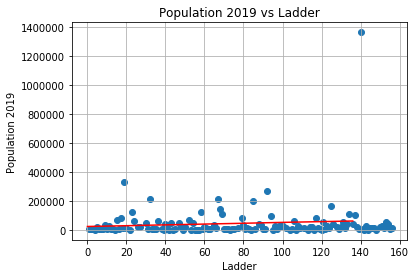

In [16]:
#Fitted line
preds=model_fit.predict(merged_df['Ladder'].values.reshape(-1,1))
#reformat to plot it
preds=[i for j in preds for i in j ]
plt.scatter(merged_df['Ladder'],merged_df['pop2019'])
plt.grid()
plt.title("Population 2019 vs Ladder")
plt.ylabel("Population 2019")
plt.xlabel("Ladder")
plt.plot(preds,c='r')

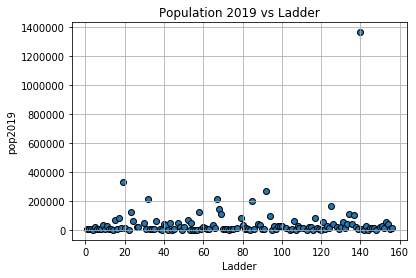

In [17]:
#scatter plot
plt.scatter(merged_df["Ladder"], merged_df["pop2019"], edgecolors="black")
plt.grid()

plt.title("Population 2019 vs Ladder")
plt.ylabel("pop2019")
plt.xlabel("Ladder")
plt.show()

In [18]:
#Finding the R-score for Freedom
xlist = happiness_df['Ladder'].tolist()
ylist = happiness_df['Freedom'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(xlist, ylist)
ypred = []

for x in xlist:
    y = slope * x + intercept
    ypred.append(y)


r2_score(ylist, ypred)

0.2980620092934727

In [19]:
#initiate the linear regression 
lm=LinearRegression()
#fit on the data. It finds the line that minimizes the difference between the data points and the regression line
model_fit=lm.fit(happiness_df['Ladder'].values.reshape(-1,1),happiness_df['Freedom'].values.reshape(-1,1))

f'slope: {model_fit.coef_},intercept: {model_fit.intercept_}'

'slope: [[0.53601721]],intercept: [35.81715734]'

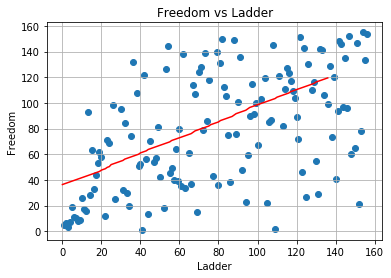

In [20]:
#Fitted line
preds=model_fit.predict(happiness_df['Ladder'].values.reshape(-1,1))
#reformat to plot it
preds=[i for j in preds for i in j ]
plt.scatter(happiness_df['Ladder'],happiness_df['Freedom'])
plt.grid()
plt.title("Freedom vs Ladder")
plt.ylabel("Freedom")
plt.xlabel("Ladder")
plt.plot(preds,c='r')

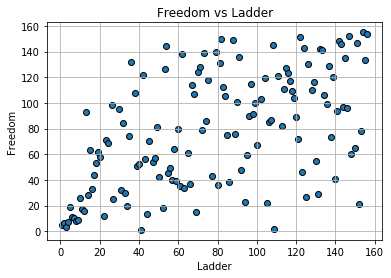

In [21]:
#scatter plot
plt.scatter(happiness_df["Ladder"], happiness_df["Freedom"], edgecolors="black")
plt.grid()

plt.title("Freedom vs Ladder")
plt.ylabel("Freedom")
plt.xlabel("Ladder")
plt.show()

In [22]:
#Finding the R-score for Social Support

xlist = happiness_df['Ladder'].tolist()
ylist = happiness_df['Social support'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(xlist, ylist)
ypred = []

for x in xlist:
    y = slope * x + intercept
    ypred.append(y)

var_list.append("Social Support")
r_list.append(r2_score(ylist, ypred))
#r2_score(ylist, ypred)

In [23]:
#initiate the linear regression 
lm=LinearRegression()
#fit on the data. It finds the line that minimizes the difference between the data points and the regression line
model_fit=lm.fit(happiness_df['Ladder'].values.reshape(-1,1),happiness_df['Social support'].values.reshape(-1,1))

f'slope: {model_fit.coef_},intercept: {model_fit.intercept_}'

'slope: [[0.83386878]],intercept: [11.15983748]'

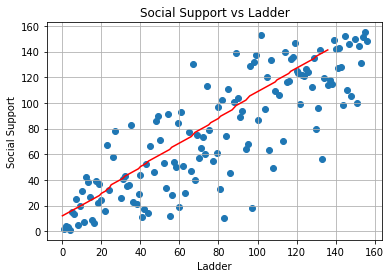

In [24]:
#Fitted line
preds=model_fit.predict(happiness_df['Ladder'].values.reshape(-1,1))
#reformat to plot it
preds=[i for j in preds for i in j ]
plt.scatter(happiness_df['Ladder'],happiness_df['Social support'])
plt.grid()
plt.title("Social Support vs Ladder")
plt.ylabel("Social Support")
plt.xlabel("Ladder")
plt.plot(preds,c='r')

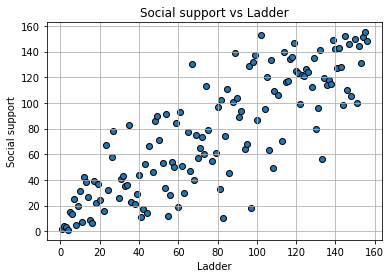

In [25]:
#scatter plot
plt.scatter(happiness_df["Ladder"], happiness_df["Social support"], edgecolors="black")
plt.grid()

plt.title("Social support vs Ladder")
plt.ylabel("Social support")
plt.xlabel("Ladder")
plt.show()

In [26]:
#Finding the R-score for Healthy Life Expectancy
xlist = happiness_df['Ladder'].tolist()
ylist = happiness_df['Healthy life\nexpectancy'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(xlist, ylist)
ypred = []

for x in xlist:
    y = slope * x + intercept
    ypred.append(y)

var_list.append("Life Expectancy")
r_list.append(r2_score(ylist, ypred))
#r2_score(ylist, ypred)

In [27]:
#initiate the linear regression 
lm=LinearRegression()
#fit on the data. It finds the line that minimizes the difference between the data points and the regression line
model_fit=lm.fit(happiness_df['Ladder'].values.reshape(-1,1),happiness_df['Healthy life\nexpectancy'].values.reshape(-1,1))
 
f'slope: {model_fit.coef_},intercept: {model_fit.intercept_}'

'slope: [[0.78921837]],intercept: [12.83183448]'

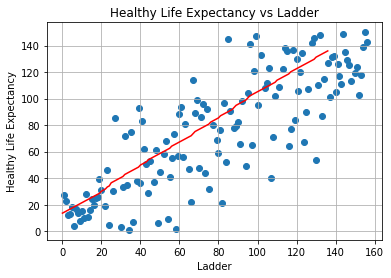

In [28]:
#Fitted line
preds=model_fit.predict(happiness_df['Ladder'].values.reshape(-1,1))
#reformat to plot it
preds=[i for j in preds for i in j ]
plt.scatter(happiness_df['Ladder'],happiness_df['Healthy life\nexpectancy'])
plt.grid()
plt.title("Healthy Life Expectancy vs Ladder")
plt.ylabel("Healthy Life Expectancy")
plt.xlabel("Ladder")
plt.plot(preds,c='r')

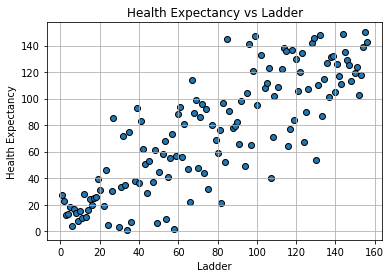

In [29]:
#scatter plot
plt.scatter(happiness_df["Ladder"], happiness_df["Healthy life\nexpectancy"], edgecolors="black")
plt.grid()

plt.title("Health Expectancy vs Ladder")
plt.ylabel("Health Expectancy")
plt.xlabel("Ladder")
plt.show()

In [30]:
#Finding the R-score for Corruption
xlist = happiness_df['Ladder'].tolist()
ylist = happiness_df['Corruption'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(xlist, ylist)
ypred = []

for x in xlist:
    y = slope * x + intercept
    ypred.append(y)

var_list.append("Corruption")
r_list.append(r2_score(ylist, ypred))
#r2_score(ylist, ypred)

In [31]:
#initiate the linear regression 
lm=LinearRegression()
#fit on the data. It finds the line that minimizes the difference between the data points and the regression line
model_fit=lm.fit(happiness_df['Ladder'].values.reshape(-1,1),happiness_df['Corruption'].values.reshape(-1,1))

f'slope: {model_fit.coef_},intercept: {model_fit.intercept_}'

'slope: [[0.20794186]],intercept: [58.7345578]'

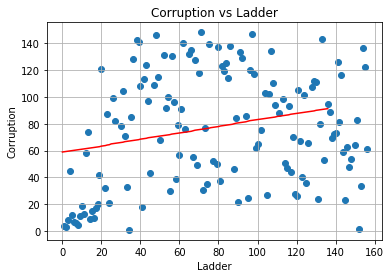

In [32]:
#Fitted line
preds=model_fit.predict(happiness_df['Ladder'].values.reshape(-1,1))
#reformat to plot it
preds=[i for j in preds for i in j ]
plt.scatter(happiness_df['Ladder'],happiness_df['Corruption'])
plt.grid()
plt.title("Corruption vs Ladder")
plt.ylabel("Corruption")
plt.xlabel("Ladder")
plt.plot(preds,c='r')

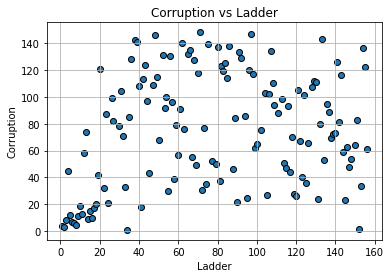

In [33]:
#scatter plot
plt.scatter(happiness_df["Ladder"], happiness_df["Corruption"], edgecolors="black")
plt.grid()

plt.title("Corruption vs Ladder")
plt.ylabel("Corruption")
plt.xlabel("Ladder")
plt.show()

In [34]:
#Finding the R-score for GDP per Capita
xlist = happiness_df['Ladder'].tolist()
ylist = happiness_df['Log of GDP\nper capita'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(xlist, ylist)
ypred = []

for x in xlist:
    y = slope * x + intercept
    ypred.append(y)

var_list.append("GDP")
r_list.append(r2_score(ylist, ypred))
#r2_score(ylist, ypred)

In [35]:
#initiate the linear regression 
lm=LinearRegression()
#fit on the data. It finds the line that minimizes the difference between the data points and the regression line
model_fit=lm.fit(happiness_df['Ladder'].values.reshape(-1,1),happiness_df['Log of GDP\nper capita'].values.reshape(-1,1))

f'slope: {model_fit.coef_},intercept: {model_fit.intercept_}'


'slope: [[0.7718746]],intercept: [17.54615373]'

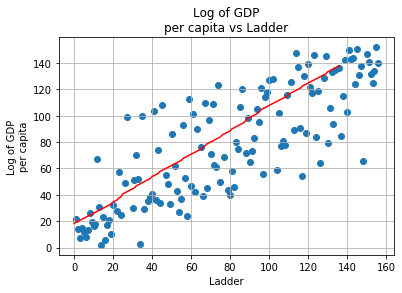

In [36]:
#Fitted line
preds=model_fit.predict(happiness_df['Ladder'].values.reshape(-1,1))
#reformat to plot it
preds=[i for j in preds for i in j ]
plt.scatter(happiness_df['Ladder'],happiness_df['Log of GDP\nper capita'])
plt.grid()
plt.title("Log of GDP\nper capita vs Ladder")
plt.ylabel("Log of GDP\nper capita")
plt.xlabel("Ladder")
plt.plot(preds,c='r')


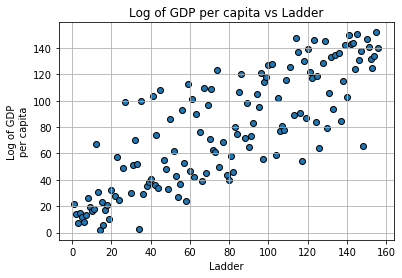

In [37]:
#scatter plot
plt.scatter(happiness_df["Ladder"], happiness_df["Log of GDP\nper capita"], edgecolors="black")
plt.grid()

plt.title("Log of GDP per capita vs Ladder")
plt.ylabel("Log of GDP\nper capita")
plt.xlabel("Ladder")
plt.show()

In [38]:
#Finding the R-score for Generosity
xlist = happiness_df['Ladder'].tolist()
ylist = happiness_df['Generosity'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(xlist, ylist)
ypred = []

for x in xlist:
    y = slope * x + intercept
    ypred.append(y)


r2_score(ylist, ypred)

0.23209312850486097

In [39]:
#initiate the linear regression 
lm=LinearRegression()
#fit on the data. It finds the line that minimizes the difference between the data points and the regression line
model_fit=lm.fit(happiness_df['Ladder'].values.reshape(-1,1),happiness_df['Generosity'].values.reshape(-1,1))

f'slope: {model_fit.coef_},intercept: {model_fit.intercept_}'

'slope: [[0.46676418]],intercept: [41.68673545]'

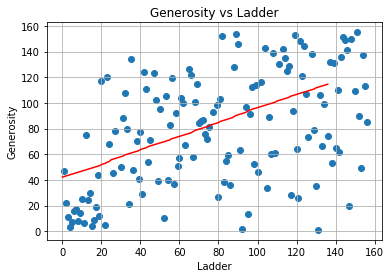

In [40]:
#Fitted line
preds=model_fit.predict(happiness_df['Ladder'].values.reshape(-1,1))
#reformat to plot it
preds=[i for j in preds for i in j ]
plt.scatter(happiness_df['Ladder'],happiness_df['Generosity'])
plt.grid()
plt.title("Generosity vs Ladder")
plt.ylabel("Generosity")
plt.xlabel("Ladder")
plt.plot(preds,c='r')

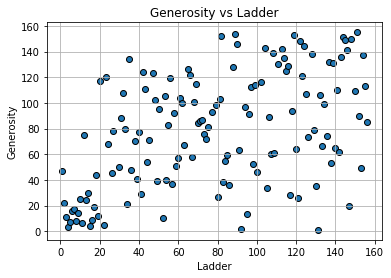

In [41]:
#scatter plot
plt.scatter(happiness_df["Ladder"], happiness_df["Generosity"], edgecolors="black")
plt.grid()

plt.title("Generosity vs Ladder")
plt.ylabel("Generosity")
plt.xlabel("Ladder")
plt.show()

In [42]:
#Printing the variables and asociated R scores
var_list

['Population Density',
 'Social Support',
 'Life Expectancy',
 'Corruption',
 'GDP']

In [43]:
r_list

[0.008141069876855256,
 0.696454072819096,
 0.6823484939153451,
 0.050335599236201456,
 0.6707921641531915]

In [44]:
#Reorder lists (decending r_score) and create Dataframe
re_order = [1,2,4,3,0]
var_list = [var_list[i] for i in re_order]
r_list = [r_list[i] for i in re_order]
r_table = pd.DataFrame()
r_table["Attribute"] = var_list
r_table["R-squared"] = r_list
r_table["R-squared"] = r_table["R-squared"].map('{:.4f}'.format)
r_table

,Attribute,R-squared
0,Social Support,0.6965
1,Life Expectancy,0.6823
2,GDP,0.6708
3,Corruption,0.0503
4,Population Density,0.0081


# Final Insights
This final table summarizes the variables and their corresponding **R$^2$** values from the linear regressions. The abridged list of attributes shown held the three highest **R$^2$** values (**Social Support**, **Life Expectancy**, and **GDP**), and the lowest two (**Corruption**, and **Population Density**). It is interesting to note that the variables that showed the highest correlation to a linear model, were mostly the more objective measures related to health and economics. This makes sense as positive values for a cultures health and economics should correlate strongly with that cultures sense of individual well-being. Additionally, humans are more difficult to predict, especially conforming to a rigid linear model. So more subjective measures aren't often expected to correlate strongly to a linear model.

Still, the highest correlation value was the more subjective value *__Social Support__*. The binary question that went into establishing that measure, essentially "Do you have someone you could count on when in trouble?", seems to be such a simple question to answer that wouldn't involve humans injecting any complications or biases into the answer.

On the other hand, for *__Corruption__*, the binary question feels more complicated and more liable to human biases (“Is corruption widespread throughout the government or not?” ). The lack of correlation in the **R$^2$** feels appropriate.

Lastly, there is no correlation between the happiness *__Ladder__* and the *__Population Density__*. We are curious if this is because the data were blurred/averaged over entire countries. If the data was on a finer scale, over cities within a state, for example, would there be more apparent trends? There may even be more apparent trends when looking at the degree of urbanization within a city or state.

